<a href="https://colab.research.google.com/github/TruongThanhNhan20146382/Nhan20146382/blob/main/flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_generator = ImageDataGenerator(rescale=1./255,validation_split=0.1,width_shift_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [4]:
trainset='/content/drive/MyDrive/AI_bt/flower'

In [5]:
train_dataset_fl=data_generator.flow_from_directory(trainset,
                                     target_size=(100,100),
                                     batch_size=128,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(100,100),
                                              batch_size=128,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)

Found 884 images belonging to 3 classes.
Found 98 images belonging to 3 classes.


In [6]:
{'.ipynb_checkpoints': 0,
 'daisy': 1,
 'lotus': 2,
 'rose': 3,
 }

{'.ipynb_checkpoints': 0, 'daisy': 1, 'lotus': 2, 'rose': 3}

In [7]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(100,100,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))

In [8]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_dataset_fl,batch_size=128,epochs=50,verbose=1,validation_data=validation_set)

Epoch 1/50
7/7 [==============================] - 203s 31s/step - loss: 3.3446 - accuracy: 0.4050 - val_loss: 0.9865 - val_accuracy: 0.5102
Epoch 2/50
7/7 [==============================] - 7s 1s/step - loss: 1.0068 - accuracy: 0.4186 - val_loss: 0.9043 - val_accuracy: 0.4082
Epoch 3/50
7/7 [==============================] - 7s 964ms/step - loss: 0.8908 - accuracy: 0.5735 - val_loss: 0.7280 - val_accuracy: 0.7041
Epoch 4/50
7/7 [==============================] - 6s 858ms/step - loss: 0.8182 - accuracy: 0.6131 - val_loss: 0.7151 - val_accuracy: 0.6531
Epoch 5/50
7/7 [==============================] - 7s 970ms/step - loss: 0.7503 - accuracy: 0.6357 - val_loss: 0.5961 - val_accuracy: 0.6939
Epoch 6/50
7/7 [==============================] - 6s 844ms/step - loss: 0.7036 - accuracy: 0.6482 - val_loss: 0.6436 - val_accuracy: 0.7143
Epoch 7/50
7/7 [==============================] - 7s 1s/step - loss: 0.6458 - accuracy: 0.6889 - val_loss: 0.6090 - val_accuracy: 0.7857
Epoch 8/50
7/7 [==========

In [9]:
model.save('flower.hs')

In [10]:
model2=load_model('flower.hs')

In [12]:
label = ['daisy','lotus', 'rose']

1/1 [==============================] - 1s 510ms/step
daisy


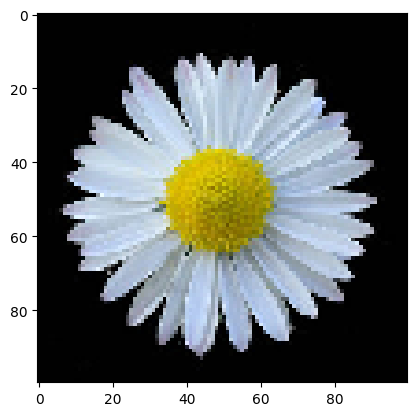

In [13]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/AI_bt/test/flower/daisy (8).jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])

1/1 [==============================] - 0s 59ms/step
rose


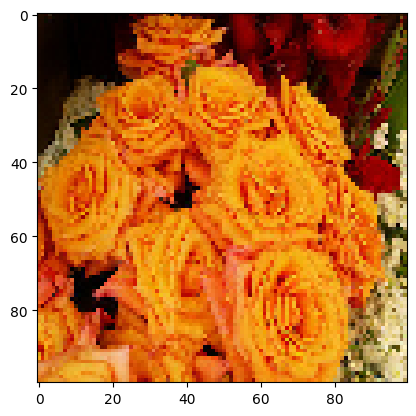

In [14]:
img = load_img('/content/drive/MyDrive/AI_bt/test/flower/rose (7).jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])

1/1 [==============================] - 0s 31ms/step
lotus


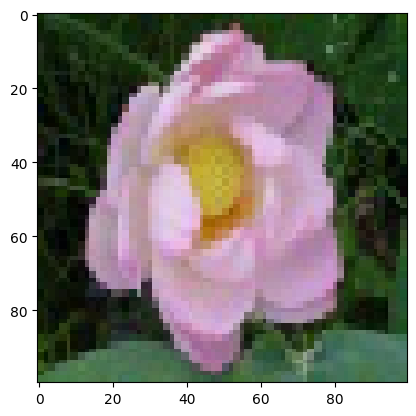

In [15]:
img = load_img('/content/drive/MyDrive/AI_bt/test/flower/lotus (1).jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])